In [1]:
import maboss
import ginsim

In [2]:
import biolqm

# Model of the cellular network driving Th1 and Th17 cell specification

In [3]:
lrg = ginsim.load("ThIL17diff_29nov2020.zginml")

In [4]:
lqm = ginsim.to_biolqm(lrg)

### Define reporter components (outputs)

In [5]:
reporter_components = ["IL2", "IL17A", "IL17F", "IFNg"]

### Define input conditions

In [6]:
Common_Nodes = [
    'CD4', 'CD80', 'CGC', 
    'IL12RB1', 'IL12RB2', 'IL1R1', 'IL1RAP', 'IL2RA', 'IL2RB', 
    'Lck', 'MHCII_b2', 'NFAT2A_b2', 'PIP2', 'TCR_b2',
]
Th1_ON_Nodes = Common_Nodes + ['IL12_In']
Th17_ON_Nodes = Common_Nodes + ['IL1_In', 'IL23_In', 'TGFB_In', 'IL6_In']
IL12_IL1B_ON_Nodes = Common_Nodes + ['IL1_In', 'IL12_In']

## 2 - Stochastic simulations using MaBoSS

![alt text](figure5.webp "Title")

Figure 5 from the article. The quantity of \<nil\> states is explained in the legend : 
    
    
*In each case, the large grey sector correspond to cells remaining in a non activated state. Although the percentages obtained are sensitive to updating rates, these simulations point to key differences in the specific cell phenotypes obtained for different combinations of Th1/Th17 polarizing cytokines*

Using code from the notebook, we can reproduce this figure :

### TH1 input condition (Fig 5.a)

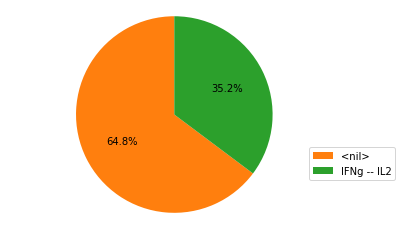

In [7]:
lqm = ginsim.to_biolqm(lrg)
mbs = biolqm.to_maboss(lqm)

maboss.set_nodes_istate(mbs, Th1_ON_Nodes, [0, 1])
mbs.network.set_output(reporter_components)
mbs.update_parameters(thread_count=6)

simres = mbs.run()
simres.plot_piechart()

### TH17 input condition (Fig 5.b)

/home/vincent/.conda/envs/test_sbml/lib/python3.9/site-packages/maboss/figures.py:86: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax.pie(plot_line, labels=plotting_labels, radius=1.2,


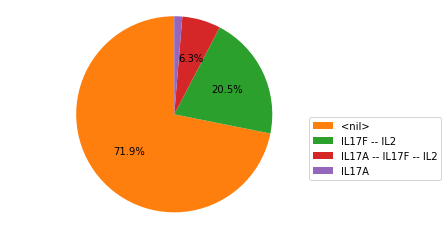

In [8]:
lqm = ginsim.to_biolqm(lrg)
mbs = biolqm.to_maboss(lqm)

maboss.set_nodes_istate(mbs, Th17_ON_Nodes, [0, 1])
mbs.network.set_output(reporter_components)
mbs.update_parameters(thread_count=6)

simres = mbs.run()
simres.plot_piechart()

### IL12+IL1B input condition (Fig 5.c)

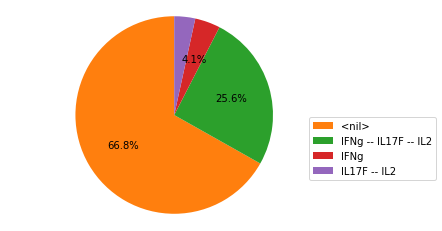

In [9]:
lqm = ginsim.to_biolqm(lrg)
mbs = biolqm.to_maboss(lqm)

maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes, [0, 1])
mbs.network.set_output(reporter_components)
mbs.update_parameters(thread_count=6)

simres = mbs.run()
simres.plot_piechart()

### Looking at initial conditions

In [10]:
lqm = ginsim.to_biolqm(lrg)
mbs = biolqm.to_maboss(lqm)
maboss.set_nodes_istate(mbs, Th1_ON_Nodes, [0, 1])
mbs.network.set_output(reporter_components)
mbs.update_parameters(thread_count=6)
mbs.print_cfg()

$nb_mutable = 0;
$u_IL1_In = 1;
$d_IL1_In = 1;
$u_IL12_In = 1;
$d_IL12_In = 1;
$u_IL23_In = 1;
$d_IL23_In = 1;
$u_TGFB_In = 1;
$d_TGFB_In = 1;
$u_IL6_Aut = 1;
$d_IL6_Aut = 1;
$u_STAT1 = 1;
$d_STAT1 = 1;
$u_Tbet = 1;
$d_Tbet = 1;
$u_IFNg = 1;
$d_IFNg = 1;
$u_IL12RB1 = 1;
$d_IL12RB1 = 1;
$u_IL12RB2 = 1;
$d_IL12RB2 = 1;
$u_IL12R = 1;
$d_IL12R = 1;
$u_STAT4 = 1;
$d_STAT4 = 1;
$u_IL1RAP = 1;
$d_IL1RAP = 1;
$u_IL1R1 = 1;
$d_IL1R1 = 1;
$u_STAT3 = 1;
$d_STAT3 = 1;
$u_IL21 = 1;
$d_IL21 = 1;
$u_IL17A = 1;
$d_IL17A = 1;
$u_IL17F = 1;
$d_IL17F = 1;
$u_RORGt = 1;
$d_RORGt = 1;
$u_TCR_b1 = 1;
$d_TCR_b1 = 1;
$u_TCR_b2 = 1;
$d_TCR_b2 = 1;
$u_IL1R = 1;
$d_IL1R = 1;
$u_CD28 = 1;
$d_CD28 = 1;
$u_Lck = 1;
$d_Lck = 1;
$u_CD4 = 1;
$d_CD4 = 1;
$u_Zap70 = 1;
$d_Zap70 = 1;
$u_Lat = 1;
$d_Lat = 1;
$u_VAV = 1;
$d_VAV = 1;
$u_PI3K_b1 = 1;
$d_PI3K_b1 = 1;
$u_PI3K_b2 = 1;
$d_PI3K_b2 = 1;
$u_SOS = 1;
$d_SOS = 1;
$u_PLCG = 1;
$d_PLCG = 1;
$u_Rac = 1;
$d_Rac = 1;
$u_PIP2 = 1;
$d_PIP2 = 1;
$u_PTEN = 1;
$d_PTEN = 1;
$u_

Here the problem is that after the conversion, all multi-valued nodes are linked at (0, 0). When we activate the lvl2 node of some of them (MHCII, NFAT2A, TCR), we are breaking this link and the initial value of the lvl1 is unset, and becomes random. Which means that half of the simulations will have lvl1=0, lvl2=1, aka an invalid initial state for this model

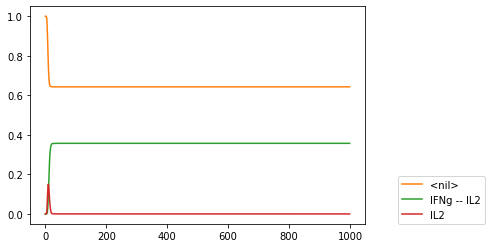

In [11]:
simres = mbs.run()
simres.plot_trajectory()

When we look at the trajectory, we see that we reach steady state, so the percentage of \<nil\> states cannot be explained by activation rates.

### Fixing initial conditions, TH1

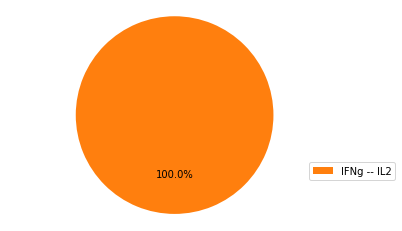

In [12]:
lqm = ginsim.to_biolqm(lrg)
mbs = biolqm.to_maboss(lqm)

maboss.set_nodes_istate(mbs, Th1_ON_Nodes+['MHCII_b1', 'NFAT2A_b1', 'TCR_b1'], [0, 1])
mbs.network.set_output(reporter_components)
mbs.update_parameters(thread_count=6)

simres = mbs.run()
simres.plot_piechart()

### TH17

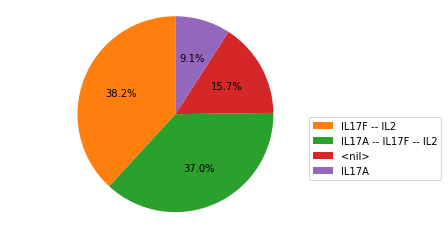

In [13]:
lqm = ginsim.to_biolqm(lrg)
mbs = biolqm.to_maboss(lqm)

maboss.set_nodes_istate(mbs, Th17_ON_Nodes+['MHCII_b1', 'NFAT2A_b1', 'TCR_b1'], [0, 1])
mbs.network.set_output(reporter_components)
mbs.update_parameters(thread_count=6)

simres = mbs.run()
simres.plot_piechart()

### IL12+IL1B 

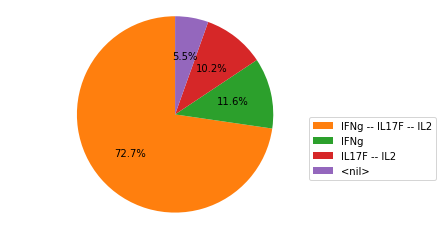

In [14]:
lqm = ginsim.to_biolqm(lrg)
mbs = biolqm.to_maboss(lqm)

maboss.set_nodes_istate(mbs, IL12_IL1B_ON_Nodes+['MHCII_b1', 'NFAT2A_b1', 'TCR_b1'], [0, 1])
mbs.network.set_output(reporter_components)
mbs.update_parameters(thread_count=6)

simres = mbs.run()
simres.plot_piechart()

When we fix the initial states of lvl1 by setting then to 1, we get a lot less \<nil\> states